<a href="https://www.kaggle.com/code/sahilr05/customer-transaction-prediction-lightgbm?scriptVersionId=107049635" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/santander-customer-transaction-prediction/sample_submission.csv
/kaggle/input/santander-customer-transaction-prediction/train.csv
/kaggle/input/santander-customer-transaction-prediction/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.manifold import TSNE # to visualise the structure of high dimensional data in 2 or 3 dimensions

In [3]:
data = pd.read_csv("/kaggle/input/santander-customer-transaction-prediction/train.csv")

In [4]:
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
# Check null values
data.isnull().values.any()

False

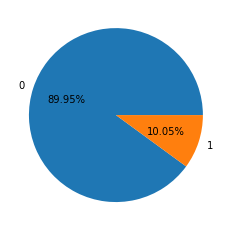

In [6]:
plt.pie(data["target"].value_counts(),labels=data["target"].unique(),autopct="%0.2f%%")
plt.show()

- Imbalance Data

In [7]:
x = data.drop(["target","ID_code"],axis=1)
y = data["target"]

Balance Dataset

In [8]:
smote = SMOTE()
x , y = smote.fit_resample(x,y)

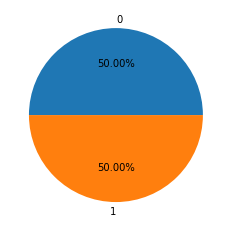

In [9]:
plt.pie(y.value_counts(),labels=y.unique(),autopct="%0.2f%%")
plt.show()

Scle the value

In [10]:
x.shape

(359804, 200)

In [11]:
scale = StandardScaler()
x = scale.fit_transform(x)

In [12]:
# X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(x)
# X_embedded.shape

In [13]:
# poly = PolynomialFeatures()
# x = poly.fit_transform(x)

split data into train & test

In [14]:
x_train,x_test, y_train,y_test =  train_test_split(x,y,test_size=0.3,stratify=y,random_state=20)

In [15]:
def run_model(model):
    print(model)
    model.fit(x_train,y_train)
    print("Traning Score", model.score(x_train,y_train))
    print("Testing Scire", model.score(x_test,y_test))
    print("=============================")

In [16]:
lor = LogisticRegression()
run_model(lor)
print("Cross Valid", cross_val_score(lor,x,y,cv=5,n_jobs=-1,))

LogisticRegression()
Traning Score 0.7968490681404896
Testing Scire 0.8005410312945841
Cross Valid [0.78860772 0.80229569 0.79750142 0.80154528 0.79947193]


In [17]:
lgbr = lgb.LGBMClassifier()
run_model(lgbr)
# print("Cross Valid", cross_val_score(lgbr,x,y,cv=5,n_jobs=-1))
print(lgbr._n_features)

LGBMClassifier()
Traning Score 0.8864378111823141
Testing Scire 0.8712734616738619
200


In [18]:
# knn = KNeighborsClassifier()
# run_model(knn)
# rdn = RadiusNeighborsClassifier()
# run_model(rdn)

In [19]:
test_data = pd.read_csv("/kaggle/input/santander-customer-transaction-prediction/test.csv")

In [20]:
test_data.drop(["ID_code"],axis=1,inplace=True)
test_data = scale.transform(test_data)

In [21]:
target = lgbr.predict(test_data)

In [22]:
sub = pd.read_csv("/kaggle/input/santander-customer-transaction-prediction/sample_submission.csv")
sub.head()
sub["target"].value_counts()

0    200000
Name: target, dtype: int64

In [23]:
sub["target"] = target

In [24]:
sub.to_csv("submission.csv",index=None)

In [25]:
pd.read_csv("submission.csv")

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
...,...,...
199995,test_199995,0
199996,test_199996,0
199997,test_199997,0
199998,test_199998,0
